# Setup Path dan Impor Modul

In [1]:
import sys
import os
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

# Menambahkan path ke direktori utama agar bisa mengimpor modul noventis
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

# Impor kelas yang akan digunakan
from noventis.data_cleaner import NoventisOutlierHandler
print('Successfully imported modules!')

Successfully imported modules!


# Memuat Dataset

In [2]:
try:
    df_diamonds = pd.read_csv('../dataset_for_examples/diamonds.csv')
    print("Dataset Diamonds berhasil dimuat.")
except FileNotFoundError:
    print("Error: Pastikan file 'diamonds.csv' dari dataset Ames Housing ada di direktori yang sama dengan notebook Anda.")

Dataset Diamonds berhasil dimuat.


# Visualisasi Outlier Sebelum Penanganan

Bentuk data awal: (53940, 11)

Statistik Deskriptif Awal:


,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000
mean,3932.799722,5.731157,5.734526,3.538734
std,3989.439738,1.121761,1.142135,0.705699
min,326.000000,0.000000,0.000000,0.000000
25%,950.000000,4.710000,4.720000,2.910000
50%,2401.000000,5.700000,5.710000,3.530000
75%,5324.250000,6.540000,6.540000,4.040000
max,18823.000000,10.740000,58.900000,31.800000


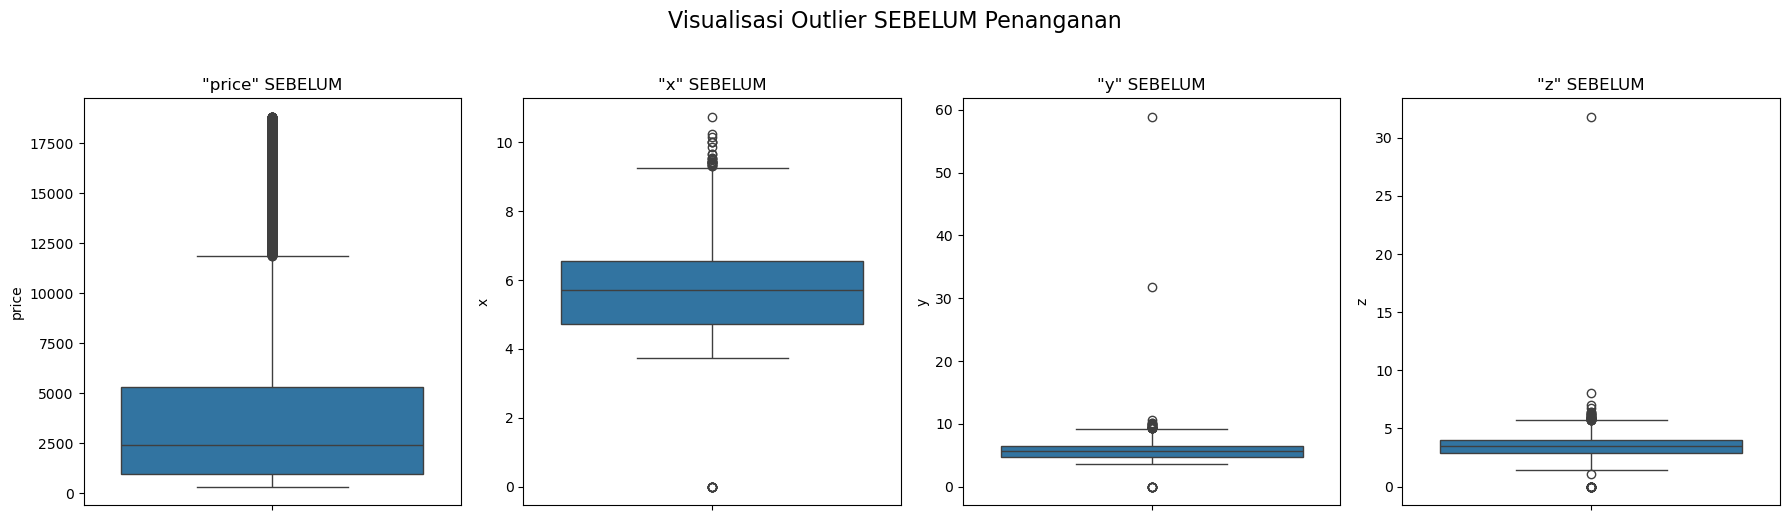

In [6]:
cols_to_check = ['price', 'x', 'y', 'z']
print(f"Bentuk data awal: {df_diamonds.shape}")
print("\nStatistik Deskriptif Awal:")
display(df_diamonds[cols_to_check].describe())

# Visualisasi SEBELUM
plt.figure(figsize=(18, 5))
for i, col in enumerate(cols_to_check):
    plt.subplot(1, len(cols_to_check), i + 1)
    sb.boxplot(y=df_diamonds[col])
    plt.title(f'"{col}" SEBELUM')
plt.suptitle('Visualisasi Outlier SEBELUM Penanganan', fontsize=16, y=1.03)
plt.tight_layout()
plt.show()

# Contoh 1 - Menggunakan Mode Otomatis


--- Menjalankan Outlier Handler dengan Mode Otomatis ---

📊 Laporan Kualitas Penanganan Outlier (Mode Otomatis):
{'outliers_removed': 16030,
 'removal_percentage': '29.72%',
 'rows_after': 37910,
 'rows_before': 53940}

📈 Perbandingan Visual Sebelum vs. Sesudah Penanganan Outlier:
Membuat visualisasi perbandingan...


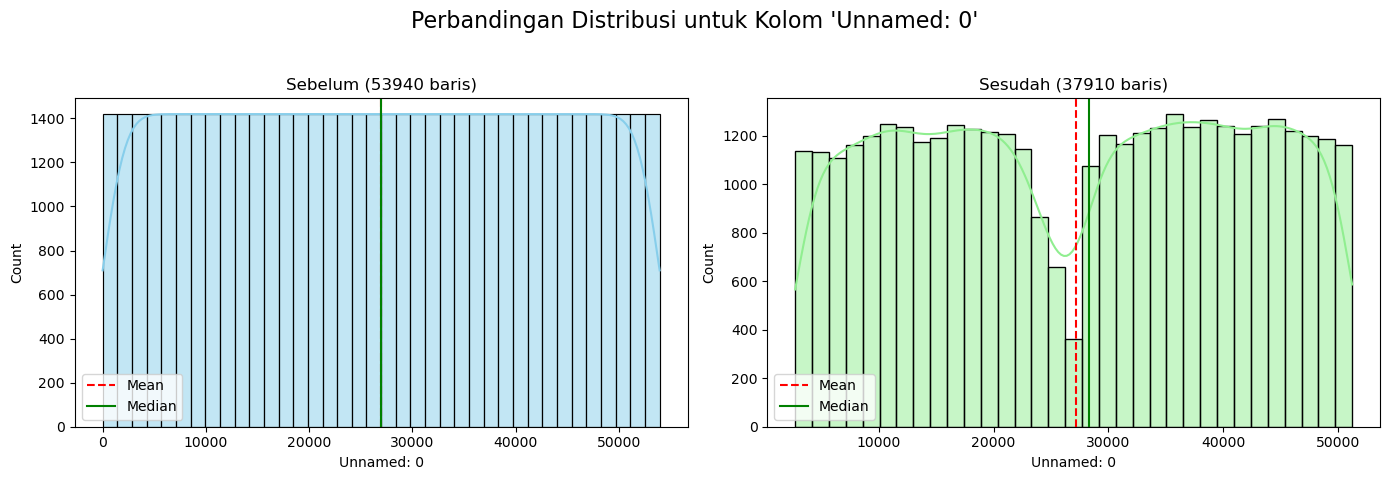

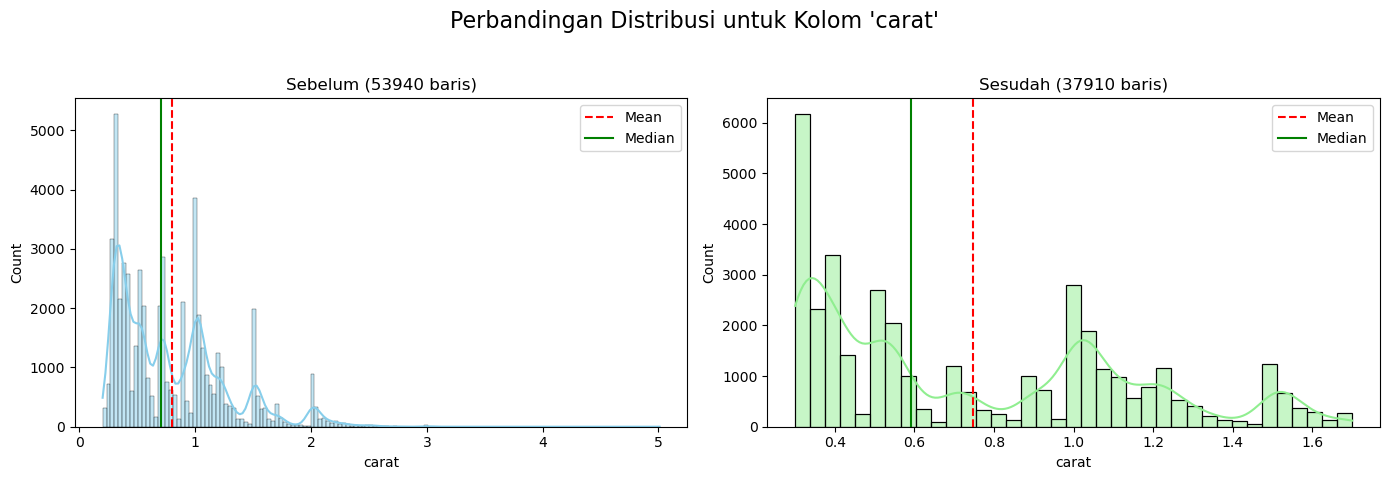

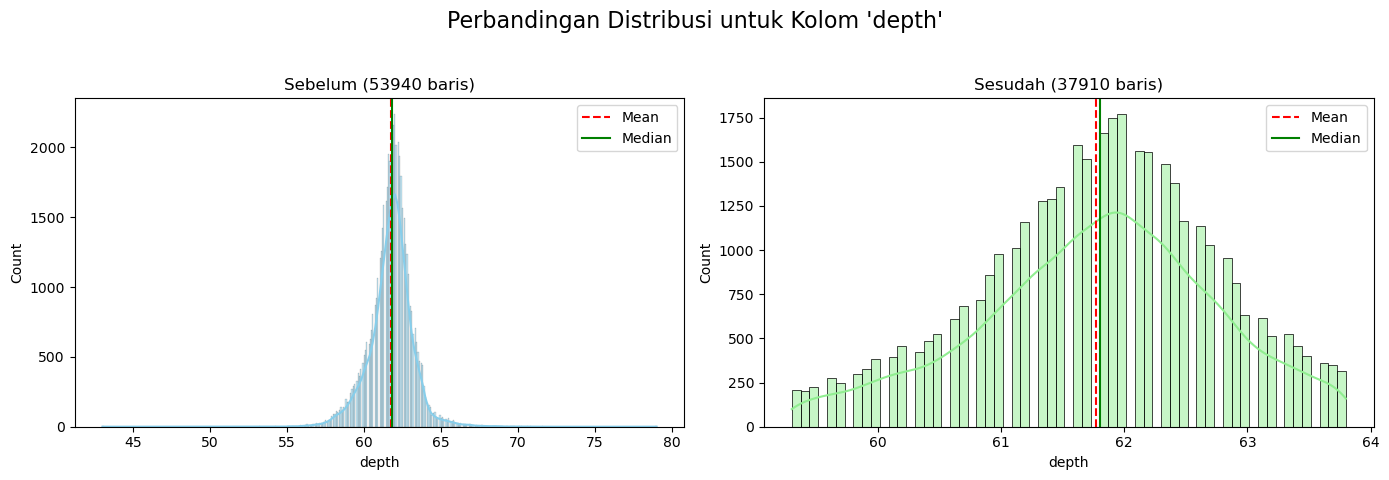

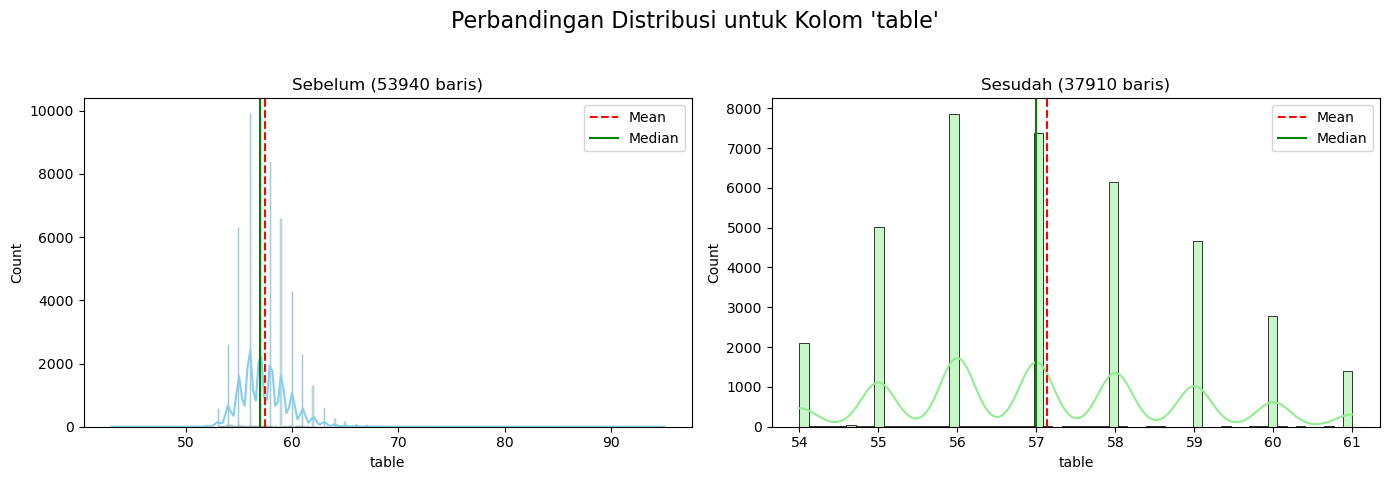

In [ ]:
print("\n--- Menjalankan Outlier Handler dengan Mode Otomatis ---")
from pprint import pprint

handler_auto = NoventisOutlierHandler(default_method='auto')

df_diamonds_copy = df_diamonds.copy()
df_handled_auto = handler_auto.fit_transform(df_diamonds_copy)

print("\n📊 Laporan Kualitas Penanganan Outlier:")
report_auto = handler_auto.get_quality_report()
pprint(report_auto)

print("\n📈 Perbandingan Visual Sebelum vs. Sesudah Penanganan Outlier:")
handler_auto.plot_comparison(max_cols=4) 

# Contoh 2 - Metode Manual 'Winsorize'


--- Menjalankan Outlier Handler dengan Metode 'Winsorize' ---

📊 Laporan Kualitas Penanganan Outlier:
{'outliers_removed': 0,
 'removal_percentage': '0.00%',
 'rows_after': 53940,
 'rows_before': 53940}

📈 Perbandingan Visual Sebelum vs. Sesudah Penanganan Outlier:
Membuat visualisasi perbandingan...


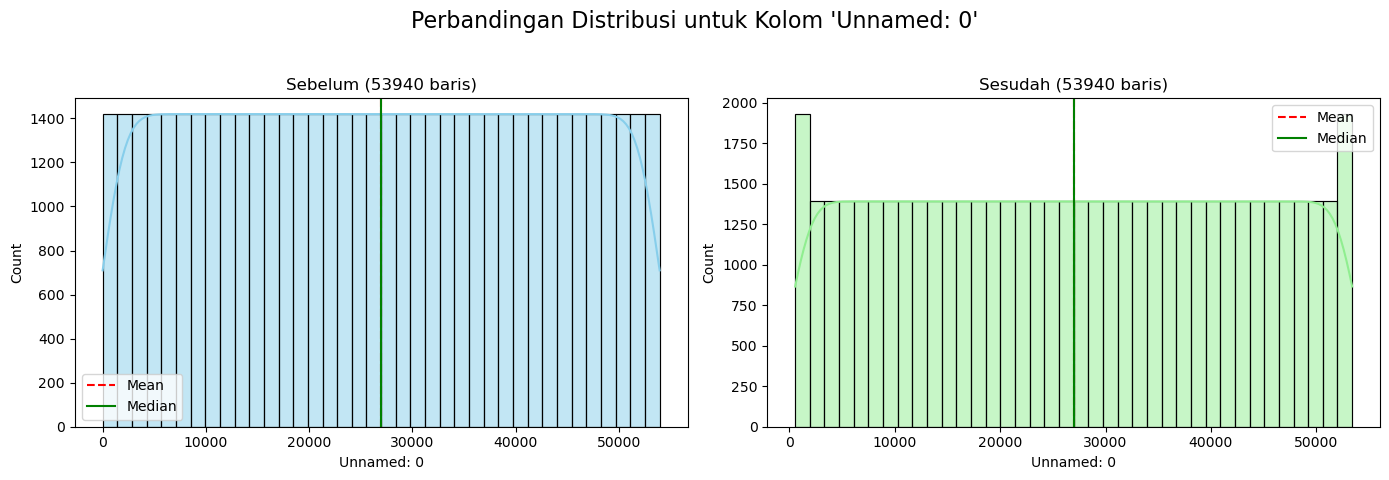

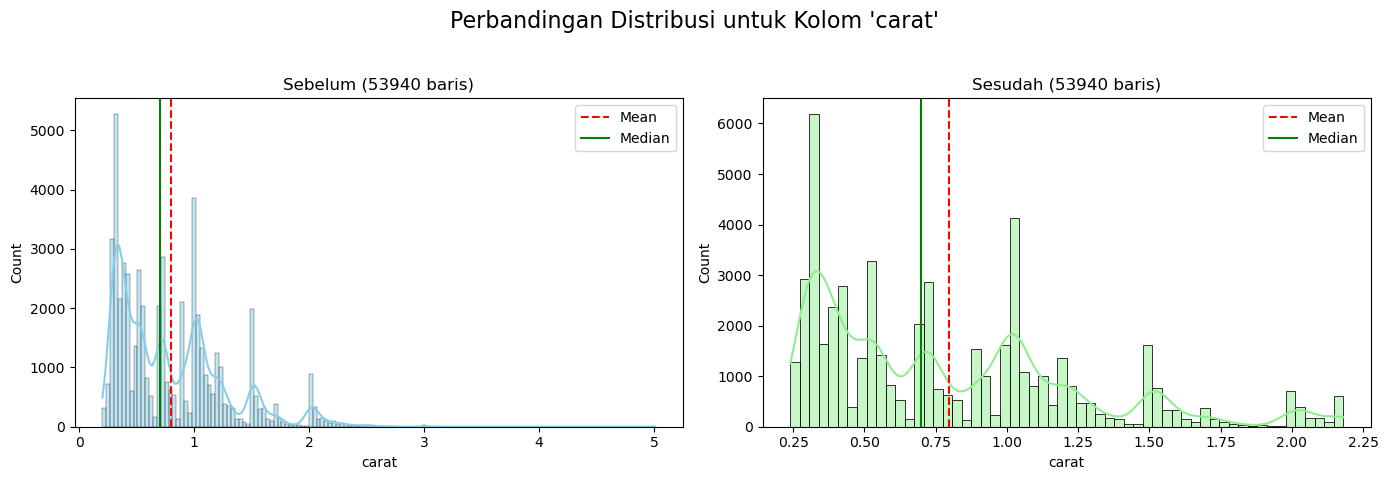

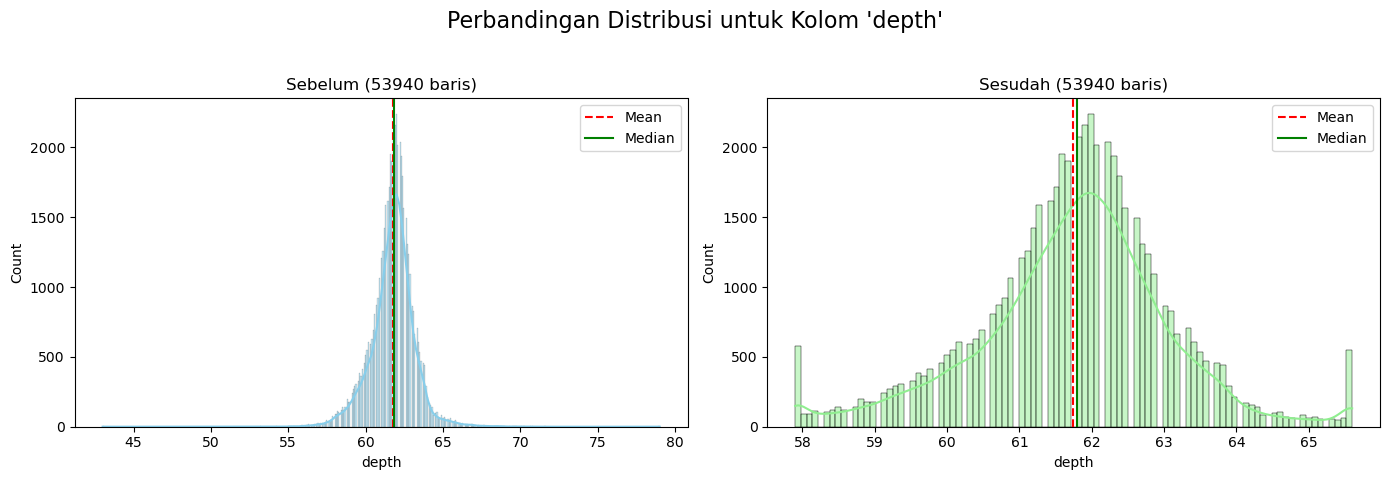

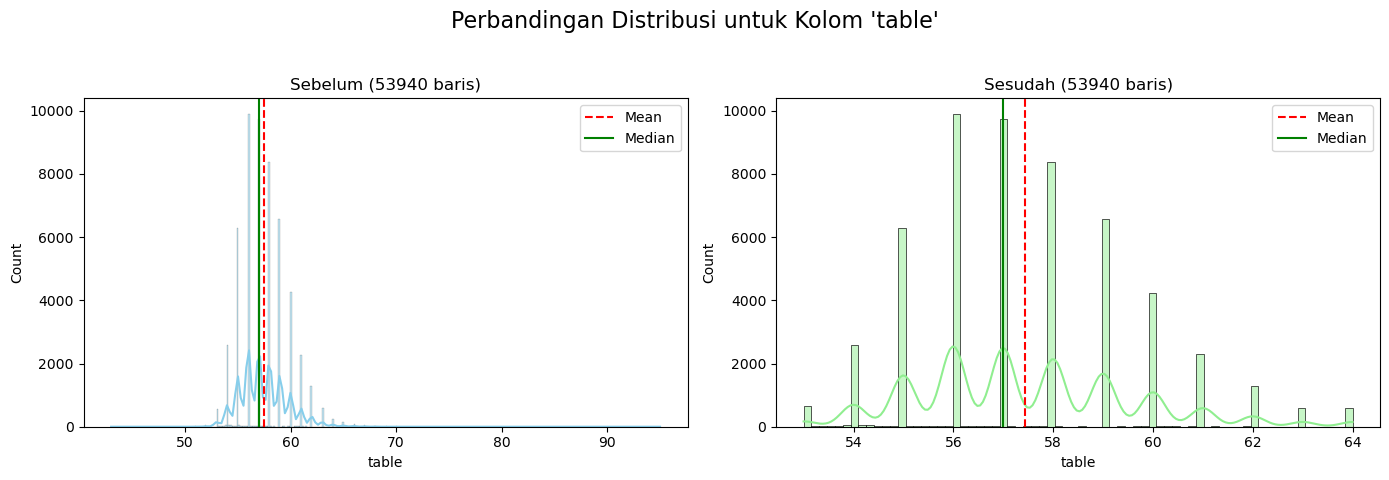

In [4]:
print("\n--- Menjalankan Outlier Handler dengan Metode 'Winsorize' ---")

handler_winsorize = NoventisOutlierHandler(default_method='winsorize', quantile_range=(0.01, 0.99))

df_winsorized = handler_winsorize.fit_transform(df_diamonds.copy())

print("\n📊 Laporan Kualitas Penanganan Outlier:")
report_winsorize = handler_winsorize.get_quality_report()
pprint(report_winsorize)

print("\n📈 Perbandingan Visual Sebelum vs. Sesudah Penanganan Outlier:")
handler_winsorize.plot_comparison(max_cols=4) 

# Contoh 3 - Menggunakan Metode Berbeda per Kolom


--- Menjalankan Handler dengan Peta Metode Spesifik ---

📊 Laporan Kualitas:
{'outliers_removed': 17193,
 'removal_percentage': '31.87%',
 'rows_after': 36747,
 'rows_before': 53940}

📈 Perbandingan Visual:
Membuat visualisasi perbandingan...


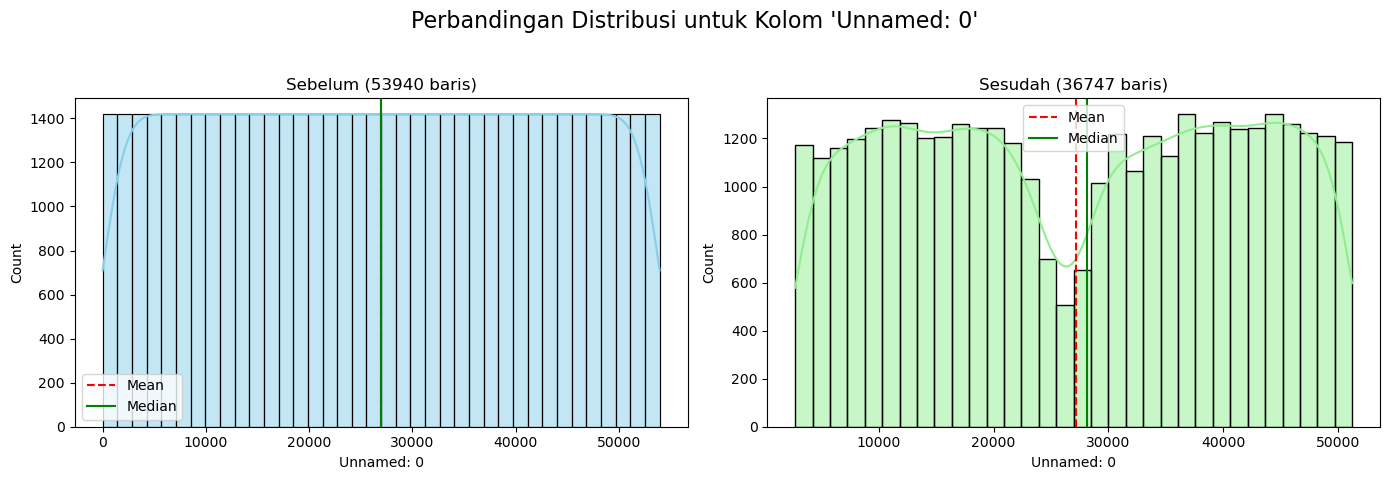

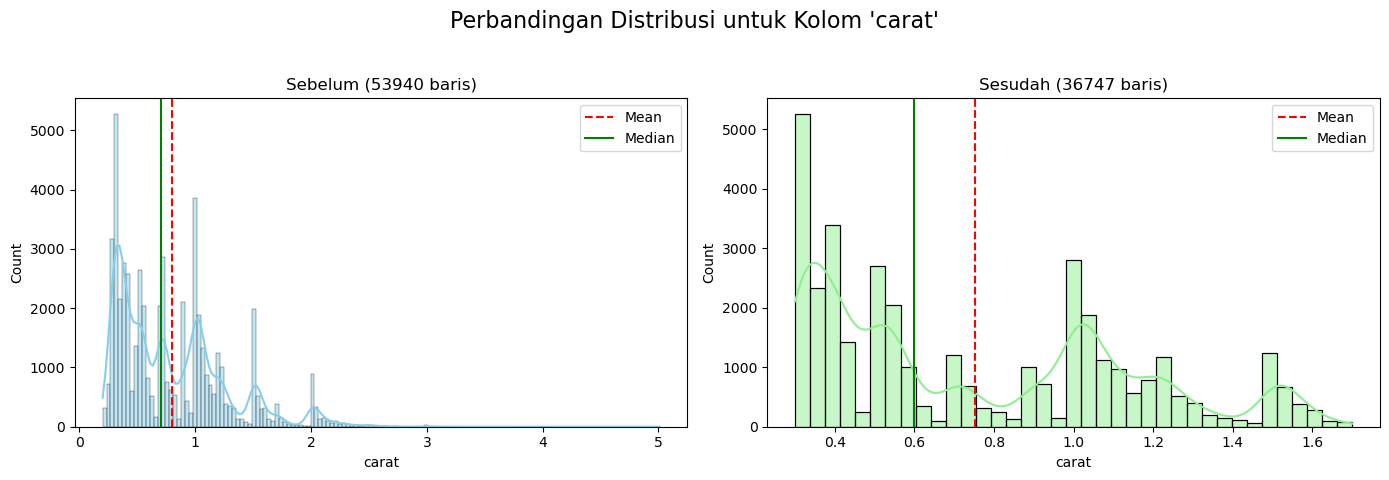

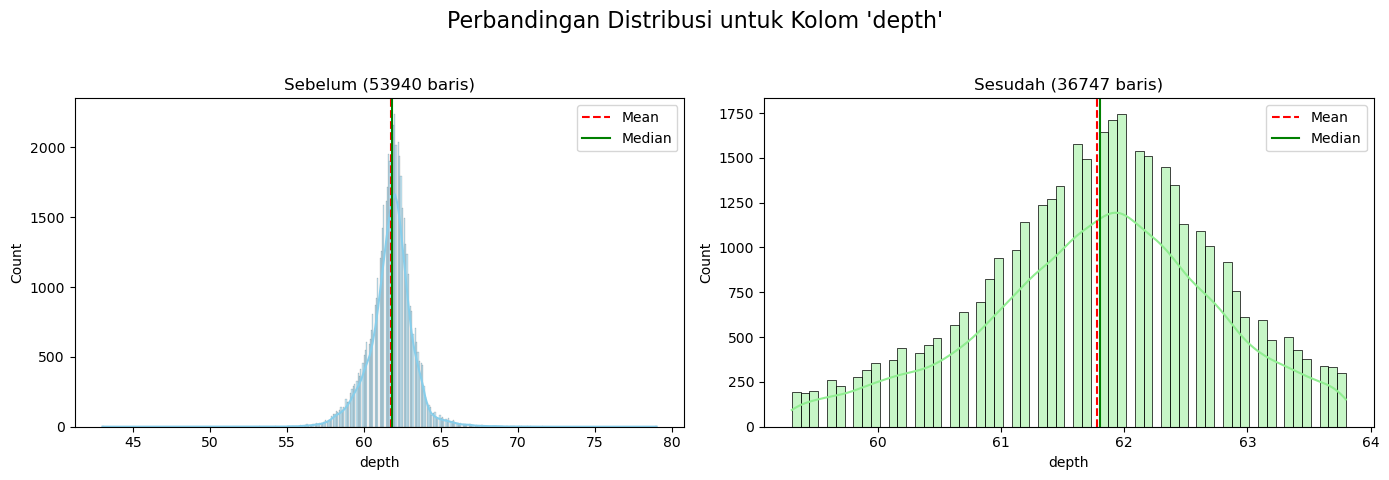

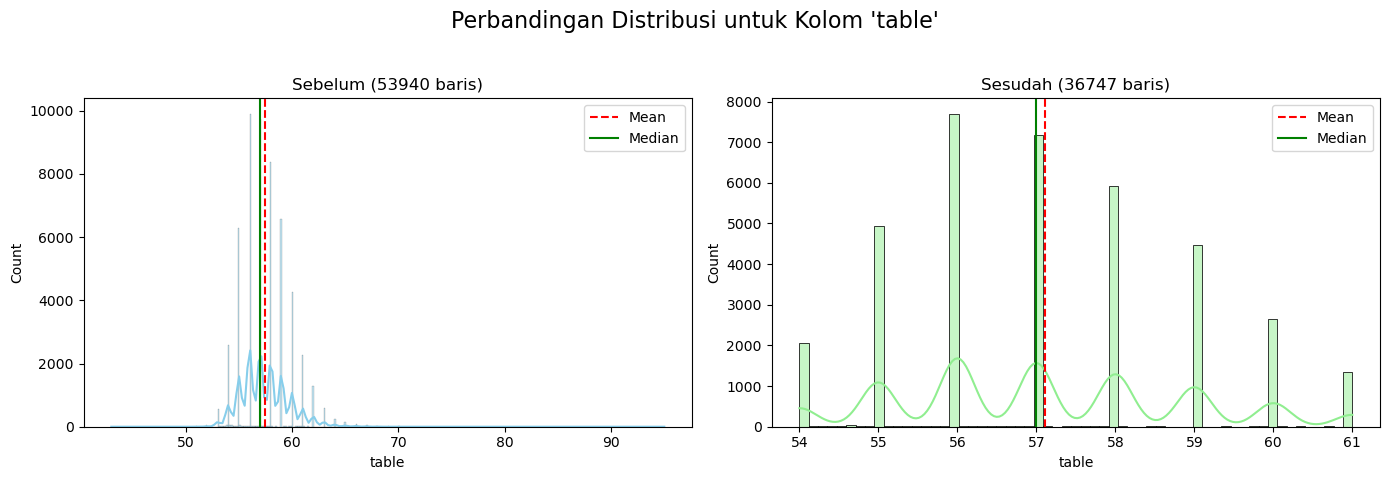

In [6]:
print("\n--- Menjalankan Handler dengan Peta Metode Spesifik ---")

# Skenario: Kita ingin 'price' di-winsorize, tapi 'x', 'y', 'z' di-trim
method_map = {
    'price': 'winsorize',
    'x': 'quantile_trim',
    'y': 'quantile_trim',
    'z': 'quantile_trim'
}

# 1. Inisialisasi handler dengan peta metode
# Kita set quantile_range yang lebih agresif untuk winsorize price (5%-95%)
handler_mapped = NoventisOutlierHandler(
    feature_method_map=method_map,
    quantile_range=(0.05, 0.95) 
)

# 2. Fit dan transform
df_handled_mapped = handler_mapped.fit_transform(df_diamonds.copy())

# 3. Tampilkan Laporan
print("\n📊 Laporan Kualitas:")
pprint(handler_mapped.get_quality_report())

# 4. Tampilkan Visual
print("\n📈 Perbandingan Visual:")
handler_mapped.plot_comparison(max_cols=4)